# Fitting and error propagation

One of the most popular fitting tools is [SciPy curve_fitting](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

However, often we want to also get an estimate on the error of the fit-parameters and derived quantities. 

This can be very easily done with the [lmfit](https://lmfit.github.io/lmfit-py/) and [uncertainty packages](https://pythonhosted.org/uncertainties/), which we will discuss here.

In [1]:
import numpy as np # widely used python library for data manipulation, the 'as' allows you to rename the package on import
import pandas as pd
import json, yaml
import sys # get some information about the current OS

import matplotlib.pyplot as plt

# show figures inline in the notebook
%matplotlib inline 


from pathlib import Path  # working with path objects - usefull for OS independent code


import lmfit # for more information see https://lmfit.github.io/lmfit-py/
from uncertainties import ufloat, umath, correlated_values,covariance_matrix  # packages to work with uncertainties


## Generate the data

In [2]:
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid)

x = np.linspace(-10, 10, 101)
y = gaussian(x, 2.33, 0.21, 1.51) + np.random.normal(0, 0.2, x.size)


## Fitting with uncertainties

parameter names: ['amp', 'cen', 'wid']
independent variables: ['x']


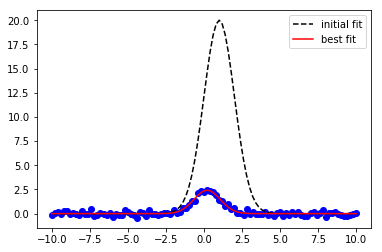

In [3]:

gmodel = lmfit.Model(gaussian) # turn the function into a model
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))

params = gmodel.make_params(cen=1, amp=20, wid=2) # generate the parametes from the function arguments and provide some initial guess

params['amp'].set(min = 0) # you can set limits for the parameters, e.g. the amplitude is always positive

# params['wid'].set(vary=False) # you can also fix some parameters - try with and without!

result = gmodel.fit(y, params, x=x)  # fit the model to the data

# plot the data, the initial guess and the fit result
plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

In [4]:
params # show the initial guesses and intervals

name,value,initial value,min,max,vary
amp,20.0000000,None,0.00000000,inf,True
cen,1.00000000,None,-inf,inf,True
wid,2.00000000,None,-inf,inf,True


show the fit report

In [5]:
result

## error propagation

### the uncertainties package
https://pythonhosted.org/uncertainties/

In [6]:
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
x = ufloat(1, 0.1)  # x = 1+/-0.1
print(2*x)
print(sin(2*x))


2.00+/-0.20
0.91+/-0.08


Another strength of this package is its correct handling of **correlations**. For instance, the following quantity is exactly zero even though x has an uncertainty:

In [7]:
x-x

0.0+/-0

### correlated variables from fit

In [8]:
# extract the values preserving the correlations between them
values_corr = correlated_values(result.best_values.values(), result.covar)
# extract the values ignoring correlations between them
values = [ufloat(m,s) for m,s in zip(result.best_values.values(), np.sqrt(np.diag(result.covar)))]

In [9]:
# the mean and error are the same for both
print('mean:', [x1.n-x2.n for x1, x2 in zip(values, values_corr)])
print('std:', [x1.s-x2.s for x1, x2 in zip(values, values_corr)])

mean: [0.0, 0.0, 0.0]
std: [2.7755575615628914e-17, 0.0, 2.7755575615628914e-17]


In [10]:
# define some function that uses two values with uncertainties
g = lambda x1, x2 : x1/x2

In [11]:
# calculate g with the correlations
g(values_corr[0], values_corr[2])

1.6065635289421838+/-0.16088336700897407

In [12]:
# calculate g without the correlations
g(values[0], values[2])

1.6065635289421838+/-0.13495847742167114

# save notebook as html

In [1]:
from edaipynb import save_notebook_as_html
save_notebook_as_html('../../html')

../../html/4) Fitting and error propagation.html saved
